In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [5]:
# load dataset .txt
df = pd.read_csv('ex2data2.txt', header=None)
df.columns = ['test1', 'test2', 'pass']
df.head()

# separate data into X_train and y_train in numpy array
X_train = df[['test1', 'test2']].values
y_train = df['pass'].values


In [6]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1 1 1 1 1]
Type of y_train: <class 'numpy.ndarray'>


In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


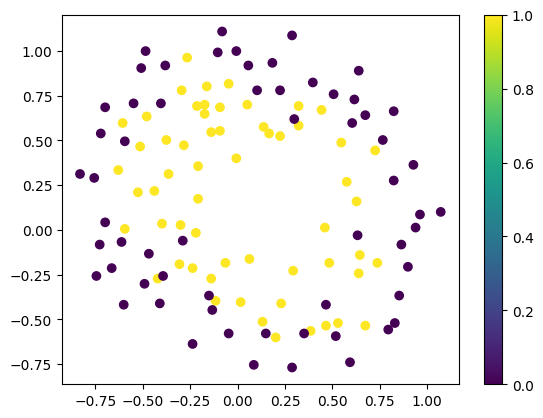

In [8]:
# plt.scatter(X_train[:,0], X_train[:,1], c=data, cmap='viridis')
# add color bar with y_train

fig, ax = plt.subplots()
sc = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)


In [10]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [17]:
print("X_train:", X_train[:1,0])
print("X_train:", X_train[:1,1])

X_train: [0.051267]
X_train: [0.69956]


In [18]:
# map_feature(X_train[:1,0], X_train[:1,1])
map_feature([1], [2])

array([[ 1,  2,  1,  2,  4,  1,  2,  4,  8,  1,  2,  4,  8, 16,  1,  2,
         4,  8, 16, 32,  1,  2,  4,  8, 16, 32, 64]])

In [19]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [20]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    z = np.clip( z, -500, 500 )           # protect against overflow

    g = 1/(1+np.exp(-z))

    return g



In [23]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    
    ### END CODE HERE ### 

    return total_cost

In [28]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    reg_cost = sum(np.square(w))
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [27]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
print("initial_w:", initial_w)
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

initial_w: [-0.082978    0.22032449 -0.49988563 -0.19766743 -0.35324411 -0.40766141
 -0.31373979 -0.15443927 -0.10323253  0.03881673 -0.08080549  0.1852195
 -0.29554775  0.37811744 -0.47261241  0.17046751 -0.0826952   0.05868983
 -0.35961306 -0.30189851  0.30074457  0.46826158 -0.18657582  0.19232262
  0.37638915  0.39460666 -0.41495579]
Regularized cost : 0.6618252552483948


In [29]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [30]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

In [31]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )



dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


In [55]:
print(X_mapped)

[[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [32]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [33]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


In [47]:
print(w)
print(b)

[ 0.91430359  1.4923378  -2.59208306 -1.0206783  -1.70874963 -0.09508199
 -0.70729902 -0.45522579 -0.2625241  -1.50258859 -0.14183125 -0.44103606
 -0.5216627  -0.85782008 -0.62213889 -0.0730526  -0.11749311 -0.22665893
 -0.62206091 -0.81773062 -0.81412362  0.47440112 -0.48661532  0.20171914
  0.03665575  0.27726316 -1.43466503]
1.43411872285427


In [48]:
# plot_x = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
# plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

# plt.plot(plot_x, plot_y, c="b")


# # X_train[:, 0], X_train[:, 1]
# # plot_decision_boundary(w, b, X_mapped, y_train)

In [41]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    

    
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        print("aa")

        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        print("gg")
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

        

def sig(z):
 
    return 1/(1+np.exp(-z))

gg


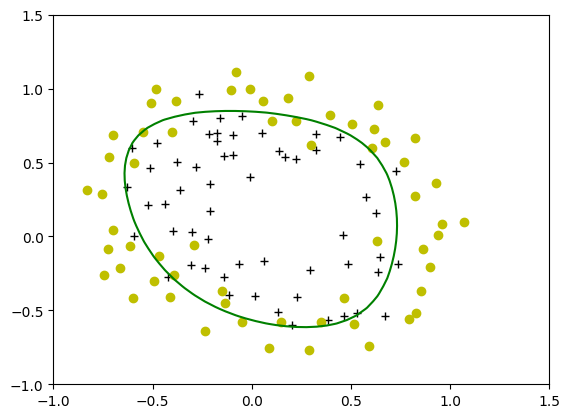

In [42]:
plot_decision_boundary(w, b, X_mapped, y_train)

# create numbers functions to tesst 

[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265  0.63265306  0.68367347  0.73469388  0.78571429
  0.83673469  0.8877551   0.93877551  0.98979592  1.04081633  1.09183673
  1.14285714  1.19387755  1.24489796  1.29591837  1.34693878  1.39795918
  1.44897959  1.5       ]
[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265 

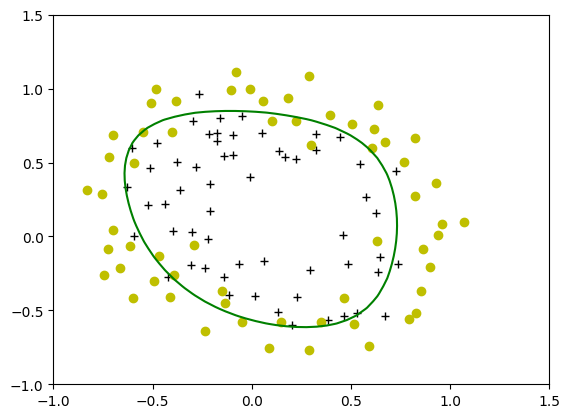

In [54]:
plot_data(X_mapped[:, 0:2], y_train)
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
print(u)
print(v)
z = np.zeros((len(u), len(v)))
print(z)
print("gg")
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)

print(z)
# important to transpose z before calling contour       
z = z.T
print(z)
# Plot z = 0
plt.contour(u,v,z, levels = [0.5], colors="g")


In [56]:
# mutiply w_tmp and X_train and add b_tmp
y = sigmoid(np.dot(X_mapped,w.T) + b)
# y = sigmoid(1*X_train[:,0] + 1*X_train[:,1] - 120)

# round y to 2 decimal places
y = np.round(y, 2)
print(y)

# # Apply the threshold to the predictions y > 0.5 returns a numpy array of 1s and 0s
y_pred = (y > 0.5).astype(int)
print(y_pred)

print('Train Accuracy: %f'%(np.mean(y_pred == y_train) * 100))



[0.73 0.75 0.73 0.75 0.65 0.61 0.67 0.62 0.64 0.58 0.53 0.51 0.57 0.45
 0.65 0.75 0.82 0.57 0.73 0.63 0.51 0.51 0.46 0.49 0.6  0.51 0.53 0.36
 0.81 0.6  0.19 0.6  0.77 0.79 0.75 0.72 0.65 0.74 0.77 0.67 0.75 0.72
 0.6  0.77 0.66 0.7  0.4  0.81 0.58 0.65 0.81 0.85 0.82 0.82 0.8  0.69
 0.75 0.67 0.2  0.56 0.74 0.36 0.26 0.47 0.28 0.08 0.28 0.07 0.1  0.22
 0.14 0.18 0.15 0.18 0.25 0.45 0.62 0.53 0.31 0.31 0.52 0.55 0.4  0.52
 0.16 0.33 0.31 0.32 0.63 0.26 0.23 0.51 0.61 0.28 0.13 0.01 0.01 0.33
 0.05 0.08 0.3  0.01 0.47 0.32 0.6  0.4  0.53 0.7  0.4  0.26 0.22 0.24
 0.19 0.36 0.56 0.08 0.11 0.64]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]
Train Accuracy: 82.203390
